In [1]:
from langgraph.graph import StateGraph, START, END
from langchain_google_genai import ChatGoogleGenerativeAI
from typing import TypedDict, Literal, Annotated
from dotenv import load_dotenv
from langchain_core.messages import  HumanMessage, BaseMessage
from langgraph.checkpoint.memory import MemorySaver

In [2]:
from langgraph.graph.message import add_messages

class chatstate(TypedDict):
    messages :Annotated[list[BaseMessage], add_messages]

In [3]:
llm= ChatGoogleGenerativeAI(
    model="gemini-2.5-flash",
    temperature=0
)
def chat_node(state:chatstate):

    messages= state['messages']

    response= llm.invoke(messages)

    return {'messages': [response]}

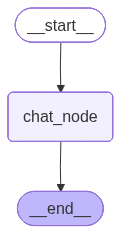

In [4]:
checkpointer= MemorySaver()
graph= StateGraph(chatstate)

graph.add_node('chat_node',chat_node)

graph.add_edge(START, 'chat_node')

graph.add_edge('chat_node', END)


workflow= graph.compile(checkpointer=checkpointer)
workflow

In [5]:
initial_state ={
    'messages':[HumanMessage(content='what is the capital of India')]
}

workflow.invoke(initial_state)

ValueError: Checkpointer requires one or more of the following 'configurable' keys: thread_id, checkpoint_ns, checkpoint_id

In [ ]:
thread_id = '1'
while True:

    user_message = input("Type Here:")
    print('User:', user_message)

    if user_message.strip().lower() in ['exit', 'quit', 'bye']:
        break
    config = {'configurable': {'thread_id': thread_id}}
    response = workflow.invoke({'messages': [HumanMessage(content= user_message)]}, config=config)

    print('AI:', response['messages'][-1].content)

User: hi
AI: Hi there! How can I help you today?
User: my name is arshin
AI: Nice to meet you, Arshin! It's a pleasure to connect with you. How can I assist you today?
User: who is the prime of india
AI: The current Prime Minister of India is **Narendra Modi**.
User: end
AI: Okay, Arshin. If you have any more questions in the future, feel free to ask! Have a great day.
